In [ ]:
import pandas as pd

In [3]:
import arrow
arrow.now().floor('day')


<Arrow [2025-06-28T00:00:00+05:30]>

In [71]:
print(end)

2025-06-28T23:59:59.999999+05:30


In [68]:
import arrow
import requests

start = arrow.now().floor('day')
end = arrow.now().ceil('day')

parameters = [
    'airTemperature',
    'pressure',
    'cloudCover',
    'currentDirection',
    'currentSpeed',
    'dewPointTemperature',
    'gust',
    'humidity',
    'iceCover',
    'precipitation',
    'rain',
    'snow',
    'graupel',
    'seaLevel',
    'snowAlbedo',
    'snowDepth',
    'seaIceThickness',
    'swellDirection',
    'swellHeight',
    'swellPeriod',
    'secondarySwellDirection',
    'secondarySwellHeight',
    'secondarySwellPeriod',
    'waterTemperature',
    'waveDirection',
    'waveHeight',
    'wavePeriod',
    'windWaveDirection',
    'windWaveHeight',
    'windWavePeriod',
    'windDirection',
    'windSpeed'
]

response = requests.get(
  'https://api.stormglass.io/v2/weather/point',
  params={
    'lat': 39.60920981924027,
    'lng': -9.08905726527935,
    'params': ','.join(parameters),
    'start': ['2017-01-01T00:00'],  # Convert to UTC timestamp
    'end':   end,  # Convert to UTC timestamp
    'source': ['sg']
  },
  headers={
    'Authorization': '034a0e40-511c-11f0-9ea7-0242ac130006-034a0ea4-511c-11f0-9ea7-0242ac130006'
  }
)

# Do something with response data.
json_data = response.json()

if 'errors' in json_data.keys():
    print("fuck off")
else :
    print("nice")
    
print("daily fetch left : ",10 - json_data['meta']['requestCount'])



nice
daily fetch left :  0


In [64]:
# print(json_data)

In [32]:
import csv

with open('data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Parameter', 'Value'])  # header
    for key, value in json_data.items():
        writer.writerow([key, value])

In [69]:
import csv

rows = json_data['hours']

processed_rows = []
for row in rows:
    flat_row = {'time': row['time']}
    for param in parameters:
        value = row.get(param)
        if isinstance(value, dict) and 'sg' in value:
            flat_row[param] = value['sg']
        else:
            flat_row[param] = value  # keep as is, or None if missing
    processed_rows.append(flat_row)
with open('hours_data1.csv', 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=['time'] + parameters)
    writer.writeheader()
    writer.writerows(processed_rows)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

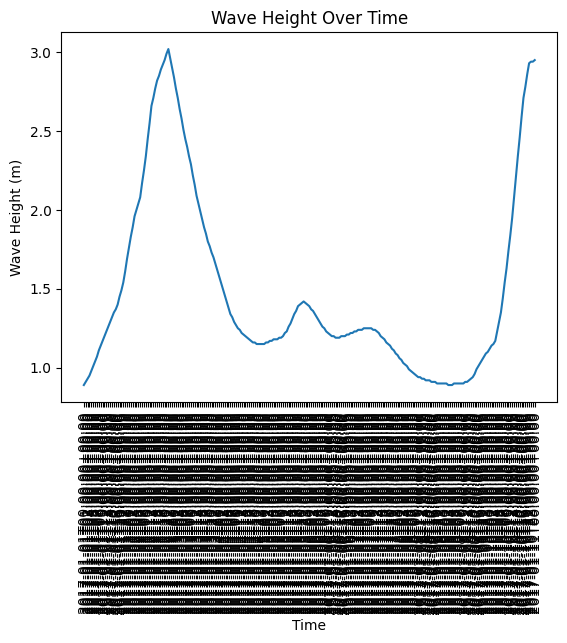

In [70]:
data = pd.read_csv('/Users/hritik/Documents/Project /Wave Prediction/hours_data1.csv')
import matplotlib.pyplot as plt
plt.plot(data['time'], data['waveHeight'])
plt.xlabel('Time')
plt.ylabel('Wave Height (m)')
plt.title('Wave Height Over Time')
plt.xticks(rotation=90)
